<a href="https://colab.research.google.com/github/hutchay/midterm-wine-quality-analysis/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Import the following file:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

This assignment will require writing Python codes.
Please submit the notebook file (in IPYNB format) together with an output file (PDF, Word or HTML)
format in the same assignment link in D2L(Don't zip the files).

QUESTIONS

Check the datatypes of the attributes. (3 points)

Are there any missing values in the dataset? (4 points)

What is the correlation between the attributes other than Quality? (10 points)

Graph the frequency distribution of wine quality by using Quality. (10 points)

Reduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of
3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)

Normalize the data set. (12 points)

Divide the dataset to training and test sets. (12 points)

Use the Decision Tree algorithm to predict the quality of wine using its attributes. (12 points)

Display the confusion matrix to evaluate the model performance. (12 points)"""

"Import the following file:\nhttp://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv\n\nThis assignment will require writing Python codes.\nPlease submit the notebook file (in IPYNB format) together with an output file (PDF, Word or HTML)\nformat in the same assignment link in D2L(Don't zip the files).\n\nQUESTIONS\n\nCheck the datatypes of the attributes. (3 points)\n\nAre there any missing values in the dataset? (4 points)\n\nWhat is the correlation between the attributes other than Quality? (10 points)\n\nGraph the frequency distribution of wine quality by using Quality. (10 points)\n\nReduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of\n3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)\n\nNormalize the data set. (12 points)\n\nDivide the dataset to training and test sets. (12 points)\n\nUse the Decision Tree algorithm to predict the quality of wine using its attributes.

In [ ]:
#importing the file from the url
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import the dataset directly from the URL
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#Check the datatypes of the attributes.
wine_data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
#Are there any missing values in the dataset?
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB



3. Correlation matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.0

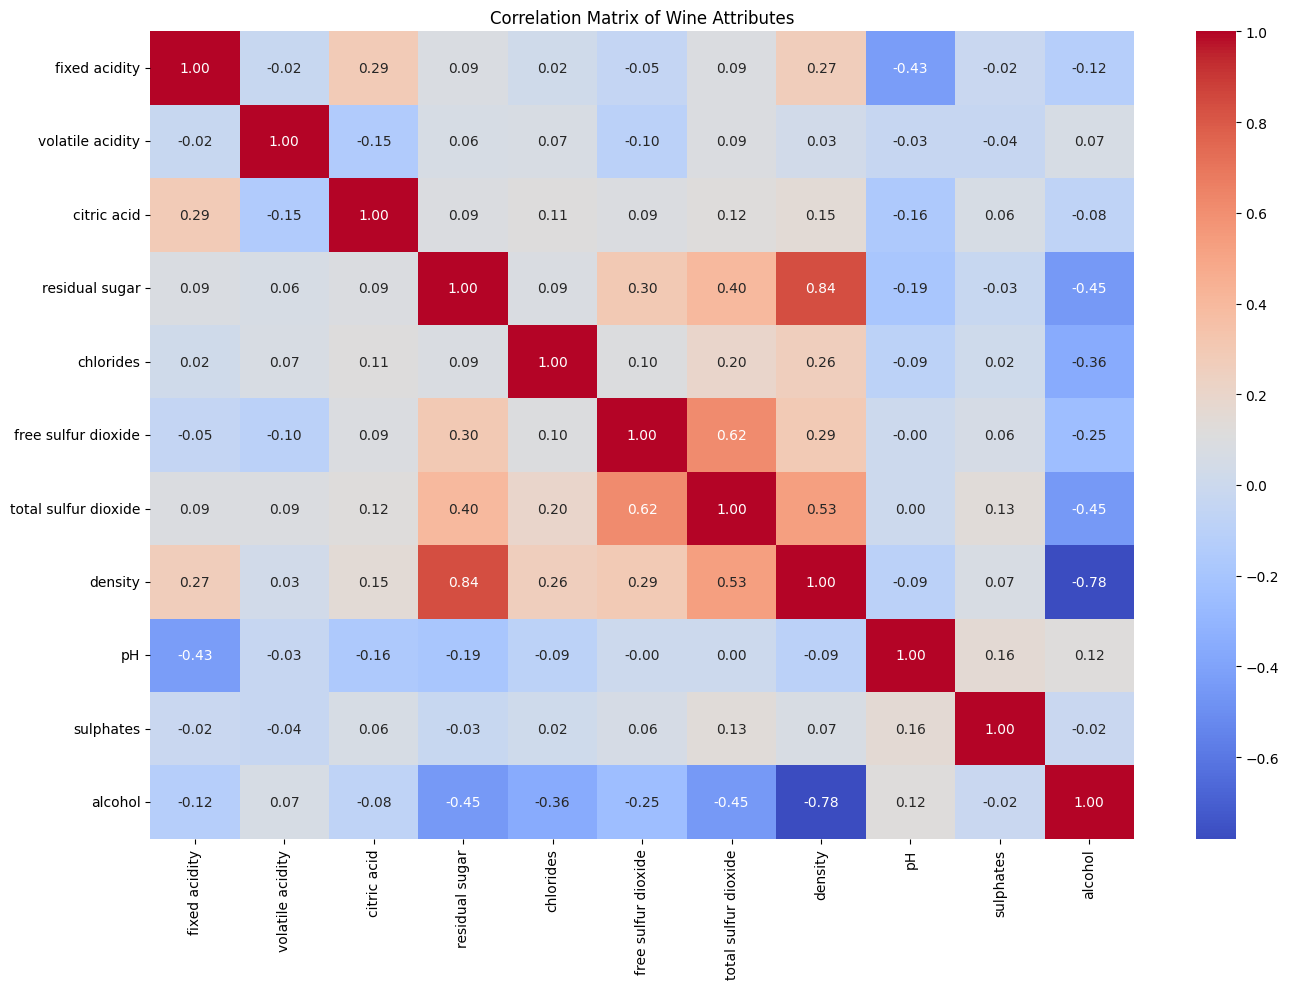

In [ ]:
# Question 3: Correlation between attributes other than Quality
wine_data['quality'] = wine_data['quality'].astype(float)

correlation_matrix = wine_data.drop('quality', axis=1).corr()
print("\n3. Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Attributes')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

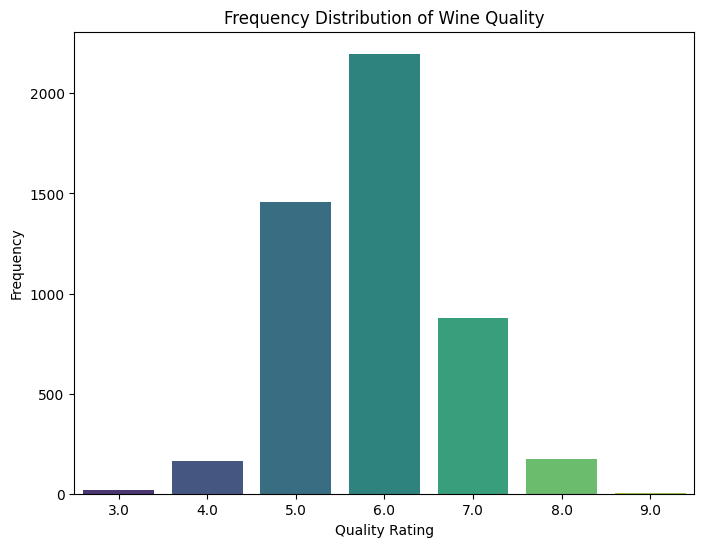

In [ ]:
#4. Frequency distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Wine Quality')
plt.show()

In [ ]:
#Reduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of
#3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2

#Convert 'quality' to integer (before categorization)
wine_data['quality'] = wine_data['quality'].astype(int)

# 2. Categorize Quality
def categorize_quality(quality):
    if quality in [3, 4]:
        return 0  # low
    elif quality in [5, 6]:
        return 1  # medium
    elif quality in [7, 8, 9]:
        return 2  # high
    else:  # Handle out-of-range values explicitly (exclude them)
        return -1  # Mark as out-of-range



In [ ]:
# Apply function to create a new column
wine_data['quality_label'] = wine_data['quality'].apply(categorize_quality)

# Check distribution of new quality levels
print(wine_data['quality_label'].value_counts())

quality_label
1    3655
2    1060
0     183
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for normalization
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

scaler = MinMaxScaler()
wine_data[features] = scaler.fit_transform(wine_data[features])

# Print first 5 rows after normalization
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  quality  quality_label  
0  0.129032       

In [ ]:
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = wine_data[features]
y = wine_data['quality_label']  # Using the new categorized quality column

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3918, 11), y_train=(3918,)
Testing set shape: X_test=(980, 11), y_test=(980,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(max_depth= 3, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

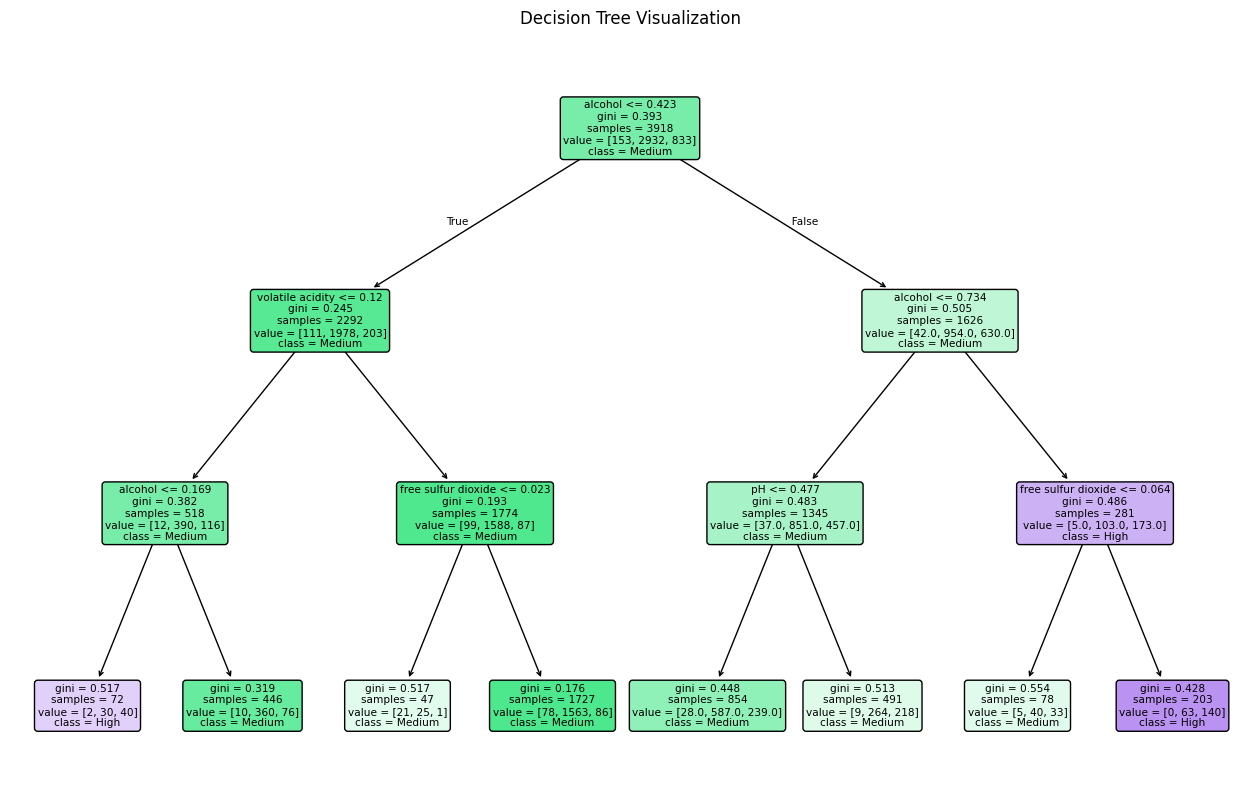

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=features, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


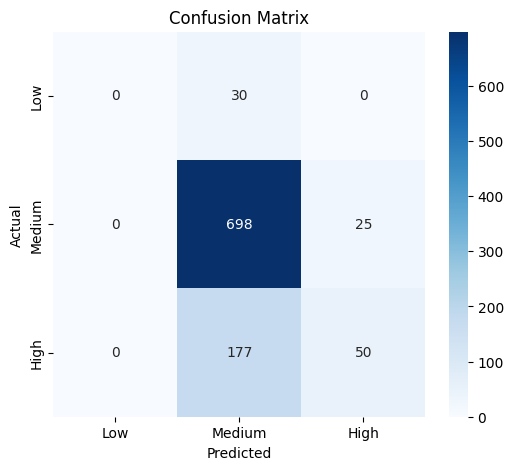

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.77      0.97      0.86       723
           2       0.67      0.22      0.33       227

    accuracy                           0.76       980
   macro avg       0.48      0.40      0.40       980
weighted avg       0.72      0.76      0.71       980

Training Accuracy: 0.7705
Test Accuracy: 0.7633


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Compute accuracy on training and test sets
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Overall Performance
Accuracy: 78% (Model correctly classifies 78% of the test data)